In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1spjlxMKsa5thVk8ev3HY1GV4HX2qP4P-'})  
downloaded.GetContentFile('sEMG_Features.csv')

In [3]:
DF = pd.read_csv('sEMG_Features.csv')
DF = DF[['0_RMS', '0_IAV', '0_Zero crossing rate', '0_Spectral slope','1_RMS', '1_IAV', '1_Zero crossing rate', '1_Spectral slope','2_RMS', '2_IAV', '2_Zero crossing rate', '2_Spectral slope','3_RMS', '3_IAV', '3_Zero crossing rate', '3_Spectral slope','4_RMS', '4_IAV', '4_Zero crossing rate', '4_Spectral slope','5_RMS', '5_IAV', '5_Zero crossing rate', '5_Spectral slope','6_RMS', '6_IAV', '6_Zero crossing rate', '6_Spectral slope','7_RMS', '7_IAV', '7_Zero crossing rate', '7_Spectral slope', 'group']]

In [4]:
DF = DF.sample(frac=1, random_state=42)
DF

0_RMS     0_IAV  ...  7_Spectral slope  group
505    0.000037  0.001212  ...         -0.000032      4
13061  0.000103  0.003795  ...         -0.000131      3
25267  0.000212  0.008464  ...         -0.000193      3
15244  0.000011  0.000405  ...         -0.000125      1
25197  0.000156  0.004761  ...         -0.000148      2
...         ...       ...  ...               ...    ...
29802  0.000041  0.001334  ...         -0.000104      6
5390   0.000032  0.001221  ...          0.000010      4
860    0.000010  0.000437  ...         -0.000146      1
15795  0.000026  0.000957  ...         -0.000081      5
23654  0.000018  0.000439  ...         -0.000132      3

[29876 rows x 33 columns]

In [5]:
y = DF.pop('group').values
X = DF.values
print(X.shape,y.shape)

(29876, 32) (29876,)


In [6]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_s = std_scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, stratify=y)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

parm_grid = [{'loss': ['log', 'modified_huber'],'max_iter': [1000,2000,3000,4000,5000], 'alpha': [0.0001,0.001,0.01, 0.00001], 'tol': [1e-3, 1e-4, 1e-5]},
              {'loss': ['log', 'modified_huber'], 'penalty':['l1'], 'max_iter': [1000,2000,3000,4000,5000], 'alpha': [0.0001,0.001,0.01, 0.00001], 'tol': [1e-3, 1e-4, 1e-5]},
              {'loss': ['log', 'modified_huber'], 'penalty':['elasticnet'], 'l1_ratio': [0.1, 0.15, 0.2],'max_iter': [1000,2000,3000,4000,5000], 'alpha': [0.0001,0.001,0.01, 0.00001], 'tol': [1e-3, 1e-4, 1e-5]},]
sgd_clf = SGDClassifier()
grid_search  = GridSearchCV(sgd_clf, parm_grid, scoring = 'roc_auc_ovr')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0...
                          'max_iter': [1000, 2000, 3000, 4000, 5000],
                          'penalty': ['l1'], 'tol': [0.001, 0.0001, 1e-05]},
                         {'alpha': [0.0001, 0.001, 0.01, 1e-05],
                          'l1_ratio': [0.1, 0.15, 0.2],
                          'loss': ['log', 'modifi

In [9]:
grid_search.best_params_

{'alpha': 0.001,
 'loss': 'log',
 'max_iter': 5000,
 'penalty': 'l1',
 'tol': 1e-05}

In [10]:
final_model = grid_search.best_estimator_

In [25]:
from sklearn.metrics import accuracy_score
y_train_pred = final_model.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print(train_score)

0.7715062761506276


In [22]:
from sklearn.metrics import confusion_matrix

train_conf = confusion_matrix(y_train, y_train_pred)
train_conf

array([[3835,   12,   16,    7,   97,   21],
       [  15, 2990,  350,  126,  112,  285],
       [  45,  318, 2781,   16,  164,  652],
       [  19,  110,   12, 3184,  460,  225],
       [ 101,  185,  142,  703, 2832,   51],
       [  12,  240,  625,  282,   58, 2817]])

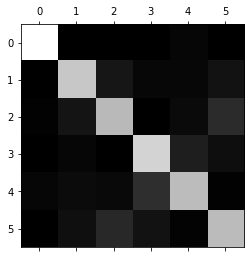

In [23]:
plt.matshow(train_conf, cmap = matplotlib.cm.gray)
plt.show()

In [26]:
y_test_pred = final_model.predict(X_test)

final_score = accuracy_score(y_test, y_test_pred)
print('The Final Accuracy Score is :',final_score)

The Final Accuracy Score is : 0.7762717536813922
